### GRU Model Training

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
X = np.load('/content/drive/MyDrive/PrognosAI_OCT25/Data/rolling_window_sequences.npy')
metadata = pd.read_csv('/content/drive/MyDrive/PrognosAI_OCT25/Data/sequence_metadata_with_RUL.csv')
y = metadata['RUL']
print('Features Shape: ',X.shape)
print('Target Shape: ', y.shape)

Features Shape:  (152559, 30, 66)
Target Shape:  (152559,)


In [4]:
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Define GRU model creation function
def create_gru_model(input_shape, units=64, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(GRU(units, input_shape=input_shape))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

In [8]:
# Create the model
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]), units=64, learning_rate=0.001, dropout_rate=0.2)

# callbacks for early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 25819.3574 - mae: 132.1250 - val_loss: 12584.8447 - val_mae: 86.8236
Epoch 2/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 11099.1045 - mae: 81.5652 - val_loss: 7005.3149 - val_mae: 62.5186
Epoch 3/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 6045.0435 - mae: 56.7077 - val_loss: 4541.4995 - val_mae: 50.3718
Epoch 4/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 4202.6860 - mae: 47.6953 - val_loss: 3729.9709 - val_mae: 45.9268
Epoch 5/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3673.2468 - mae: 45.0308 - val_loss: 3348.6580 - val_mae: 43.2114
Epoch 6/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 3464.2964 - mae: 43.9506 - val_loss: 3103.6287 - val_mae: 41.3336
Epoch 7/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 3250.6289 - mae: 42.7320 - val_loss: 2985.1057 - val_mae: 41.4074
Epoch 8/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 3066.6760 - mae: 41.4606 - val

In [13]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}')

# Predict on test set
y_pred = model.predict(X_val).flatten()

# Calculate test MSE
test_mse = mean_squared_error(y_val, y_pred)
print(f'Test MSE: {test_mse:.4f}')

Validation MSE: 1524.9952, MAE: 28.9627
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test MSE: 1524.9947


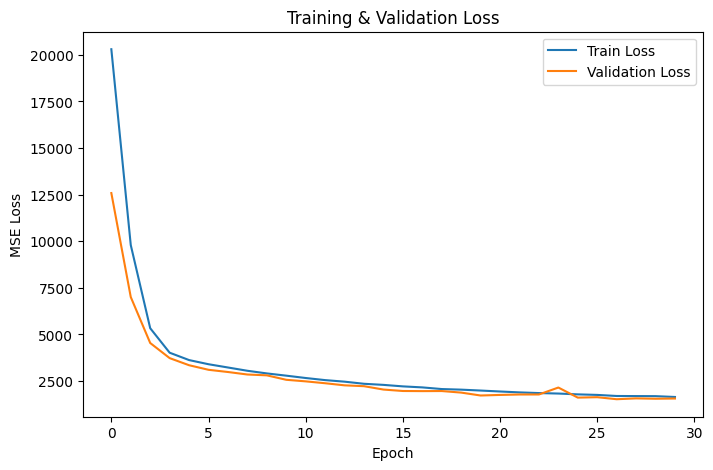

In [14]:
# Training and Validation Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

## Observations

1) Data Loading and Preprocessing

    * load rolling window sequences and metadata, target RUL in metadata

    * print shapes of features and target :: X shape: (152559, 30, 66)  Y shape: (152559,)

    * now, split into training and validation sets, test_size = 0.3 (test set = 30% that means, training set = 70%).


2. GRU Model: Hyperparameters and Callbacks Setup

    * Model type: Sequential

    * Recurrent layer: GRU with 64 units

    * Activation function: Default GRU activations (tanh for state, sigmoid for gates)

    * Input shape: Provided through input_shape, matching (window_size, num_features)

    * Dropout: Dropout layer with rate 0.2 for regularization

    * Output layer: Dense(1) for predicting a single RUL value

    * Optimizer: Adam with learning rate 0.001

    * Loss function: Mean Squared Error (MSE)

    * Additional metric: Mean Absolute Error (MAE) for better interpretability

    * Model purpose: Regression model for RUL prediction using GRU-based temporal feature extraction

    * Callback: The GRU model is trained with an EarlyStopping callback to halt training when validation loss stops improving.

3. Model Training
    
    * The model is trained for up to 30 epochs using batch size 64, with validation monitoring and EarlyStopping to prevent overfitting.

4. Verification

    * evaluate the model on the validation set, generate predictions, and compute the MSE again using sklearn to confirm the model’s prediction accuracy.

5. Training and Validation Loss Visualization

    * This plot visualizes how training and validation loss change over epochs, helping assess learning progress and detect overfitting. (The training and validation loss curves decrease closely together, indicating stable learning and minimal overfitting throughout the training process.)